
Iteration 1
Cluster 1: [array([1., 1.]), array([1.5, 2. ]), array([3., 4.])]
Centroid 1: [1.83333333 2.33333333]
Cluster 2: [array([5., 7.]), array([3.5, 5. ]), array([4.5, 5. ]), array([3.5, 4.5])]
Centroid 2: [4.125 5.375]

Iteration 2
Cluster 1: [array([1., 1.]), array([1.5, 2. ])]
Centroid 1: [1.25 1.5 ]
Cluster 2: [array([3., 4.]), array([5., 7.]), array([3.5, 5. ]), array([4.5, 5. ]), array([3.5, 4.5])]
Centroid 2: [3.9 5.1]


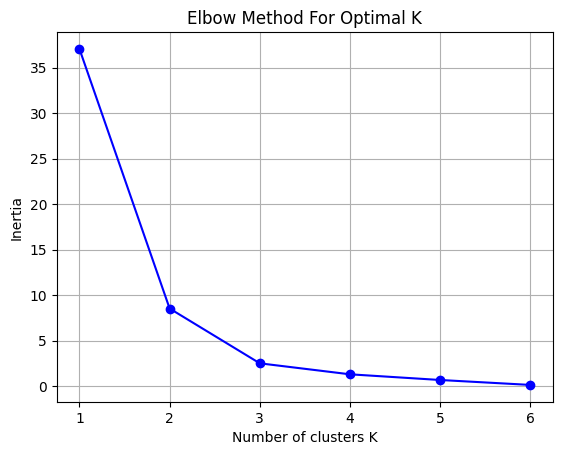

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dataset
data = np.array([
    [1.0, 1.0],
    [1.5, 2.0],
    [3.0, 4.0],
    [5.0, 7.0],
    [3.5, 5.0],
    [4.5, 5.0],
    [3.5, 4.5],
])

# Function to calculate Euclidean distance
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-Means for 2 iterations
def kmeans(data, centroids, steps=2):
    centroids = [np.array(c) for c in centroids]

    for i in range(steps):
        clusters = {0: [], 1: []}  # Assuming 2 clusters

        # Assign points to nearest centroid
        for point in data:
            dists = [distance(point, centroids[0]), distance(point, centroids[1])]
            cluster_index = np.argmin(dists)
            clusters[cluster_index].append(point)

        # Update centroids
        for k in clusters:
            centroids[k] = np.mean(clusters[k], axis=0)

        # Print results
        print(f"\nIteration {i+1}")
        for k in clusters:
            print(f"Cluster {k+1}: {clusters[k]}")
            print(f"Centroid {k+1}: {centroids[k]}")
    return centroids

# Start with R1 and R4 as centroids
initial = [data[0], data[3]]
final_centroids = kmeans(data, initial)

# Elbow method
inertia = []
K = range(1, 7)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()